In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'D:\Campus\Social_Network_Ads.csv')

In [5]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
374,37,80000,0
393,60,42000,1
357,41,72000,0
343,47,51000,1
321,53,82000,1


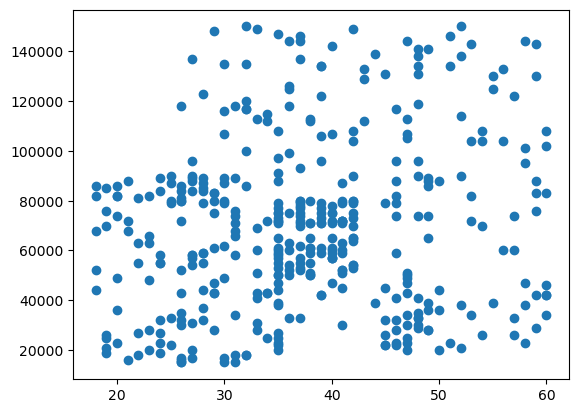

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))

D:\AnacondaApp\Data\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [31]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100)
# validation_accuracy oscillates between 40 to 60 range

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4533 - loss: 19.0378 - val_accuracy: 0.6000 - val_loss: 40.9046
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6297 - loss: 38.1785 - val_accuracy: 0.6000 - val_loss: 115.1884
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5524 - loss: 49.6829 - val_accuracy: 0.6000 - val_loss: 34.9828
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5090 - loss: 20.9587 - val_accuracy: 0.4000 - val_loss: 14.0910
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4932 - loss: 61.5045 - val_accuracy: 0.6000 - val_loss: 49.8407
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6594 - loss: 53.8640 - val_accuracy: 0.6000 - val_loss: 74.7629
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6017 - loss: 54.6084 - val_accuracy: 0.6000 - val_loss: 118.8915
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5364 - loss: 79.3031 - val_ac

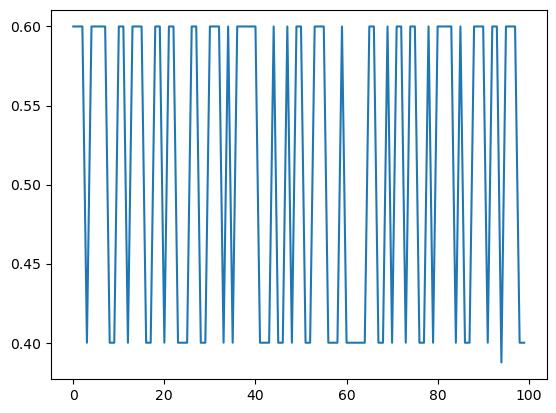

In [32]:
plt.plot(history.history['val_accuracy'])
# Accuracy oscillates between 40 to 60 but never converge
# if scale of input columns is different,neural network take time to train or Training doesn't happen (becomes very slow)

#### Applying Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

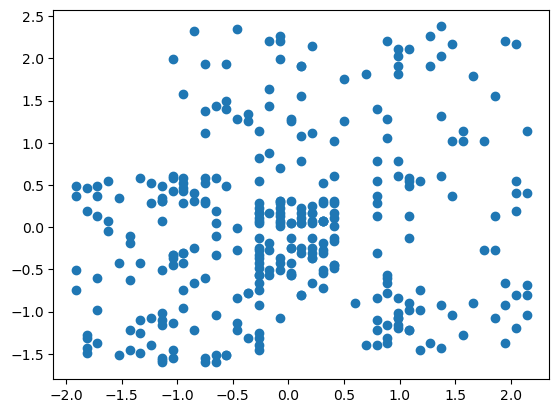

In [42]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])

In [44]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim =2))
model.add(Dense(1,activation = 'sigmoid'))
print(model.summary)
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs = 100)



<bound method Model.summary of <Sequential name=sequential_1, built=True>>
Epoch 1/100


D:\AnacondaApp\Data\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6406 - loss: 0.6909 - val_accuracy: 0.6750 - val_loss: 0.6480
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7352 - loss: 0.6354 - val_accuracy: 0.7375 - val_loss: 0.5941
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7868 - loss: 0.5891 - val_accuracy: 0.7625 - val_loss: 0.5489
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8263 - loss: 0.5456 - val_accuracy: 0.7750 - val_loss: 0.5103
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8323 - loss: 0.5084 - val_accuracy: 0.7750 - val_loss: 0.4764
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8102 - loss: 0.4753 - val_accuracy: 0.7750 - val_loss: 0.4473
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8207 - loss: 0.4606 - val_accuracy: 0.7750 - val_loss: 0.4228
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8377 - loss: 0.4357 - val_accuracy: 0.7875 - val_loss: 0.